Starting with the free particle Hamiltonian:

$$
H=-\frac{1}{2} \frac{\mathrm{d}^2}{\mathrm{~d} x^2}
$$
where we have taken for convenience $\hbar=m=1$. This is a simple 1D particle-in-a-box problem and the solutions are
$$
\psi_n(x)=\sin \left[\frac{n \pi}{2}(x+1)\right], \quad E_n=\frac{n^2 \pi^2}{2}
$$

The electron density, $n(x)$, can be calculated as $n(x)=\sum_n^{\text {occupied }}\left|\psi_n(x)\right|^2$, where the sum runs over the occupied states. If $N_{\mathrm{e}}$ is the total number of electrons in our system, the ground-state density is obtained by taking the eigenvectors of the first $N_{\mathrm{e}}$ occupied states. From the normalization of the single-particle states, $\psi_n(x)$, it follows that $\int_{0}^1 n(x) \mathrm{d} x=N_{\mathrm{e}}$. Note that here we have not introduced explicitly the electron spin, so that the problem has to be considered spinless (electrons are still fermions though). We may lift this approximation, if needed, without too much loss of generality.

The problem can be made more interesting by including an additional external potential of the type
$$
v_{\text {ext }}(x)=\sum_i v_i \mathrm{e}^{-\frac{\left(x_i-x\right)^2}{2 \sigma_i^2}}
$$

This is a collection of potential of Gaussian shape, with amplitude $v_i$ and width $\sigma_i$. Such potential can be both attractive (a quantum well), $v_i<0$, or repulsive (a quantum barrier), $v_i>0$. The Hamiltonian is now,
$$
H=-\frac{1}{2} \frac{\mathrm{d}^2}{\mathrm{~d} x^2}+v_{\mathrm{ext}}(x)
$$
and in general it must be solved numerically. Finally, the Hamiltonian can be completed by



The simplest way to solve the Schrödinger equation numerically is to transform the problem into a linear algebra one. The eigenvalues and eigenvectors will then be computed by matrix diagonalization. There are many ways to perform such transformation. Possibly the most intuitive one consists in using a real space grid. In this case, one divide the $[0,1]$ interval in $N_{\mathrm{g}}$ segments of equal length $\delta_{\mathrm{g}}=1 / N_{\mathrm{g}}$. The wave-function and all operators are then defined over a finite number of points in space, $x_m=m \delta_{\mathrm{g}}-1$, so that they become vectors and matrices respectively. In more detail, the wave-function now writes,
$$
\psi(x) \longrightarrow \psi=\left(\begin{array}{c}
\psi\left(x_0\right) \\
\psi\left(x_1\right) \\
\psi\left(x_2\right) \\
\cdots \\
\cdots \\
\psi\left(x_{N_{\mathrm{g}}}\right)
\end{array}\right)
$$
while $x$-dependent multiplicative potentials become
$$
v_{\text {ext }}(x) \longrightarrow \hat{v}_{\text {ext }}=\left(\begin{array}{cccccc}
v_{\text {ext }}\left(x_0\right) & 0 & 0 & 0 & 0 & 0 \\
0 & v_{\text {ext }}\left(x_1\right) & 0 & 0 & 0 & 0 \\
0 & 0 & v_{\text {ext }}\left(x_2\right) & 0 & 0 & 0 \\
0 & 0 & 0 & \ldots & 0 & 0 \\
0 & 0 & 0 & 0 & \ldots & 0 \\
0 & 0 & 0 & 0 & 0 & v_{\text {ext }}\left(x_{N_{\mathrm{g}}}\right)
\end{array}\right)
$$

The kinetic energy, however, requires some special attention. The numerical derivative of the wave function can be written by using a finite difference expression as (this is the so-called central difference formula, but note that several other definitions are possible)
$$
\left.\frac{\mathrm{d}}{\mathrm{dx}} \psi(x)\right|_{x=x_i} \approx \frac{\psi\left(x_i+\delta_{\mathrm{g}} / 2\right)-\psi\left(x_i-\delta_{\mathrm{g}} / 2\right)}{\delta_{\mathrm{g}}} .
$$

Using the same strategy, the second derivative writes
$$
\left.\frac{\mathrm{d}^2}{\mathrm{dx}^2} \psi(x)\right|_{x=x_i}=\left.\frac{\mathrm{d}}{\mathrm{dx}} \frac{\mathrm{d}}{\mathrm{dx}} \psi(x)\right|_{x=x_i} \approx \frac{\frac{\psi\left(x_{i+1}\right)-\psi\left(x_i\right)}{\delta_{\mathrm{g}}}-\frac{\psi\left(x_i\right)-\psi\left(x_i-1\right)}{\delta_{\mathrm{g}}}}{\delta_{\mathrm{g}}}=\frac{\psi\left(x_{i+1}\right)-2 \psi\left(x_i\right)+\psi\left(x_{i-1}\right)}{\delta_{\mathrm{g}}^2}
$$

Using the expression above the kinetic energy, $-\frac{1}{2} \frac{\mathrm{d}^2}{\mathrm{~d} x^2}$, is then associated to the matrix
$$
-\frac{1}{2} \frac{\mathrm{d}^2}{\mathrm{~d} x^2} \longrightarrow \hat{T_0}=-\frac{1}{2 \delta_{\mathrm{g}}^2}\left(\begin{array}{cccccc}
-2 & 1 & 0 & 0 & 0 & 0 \\
1 & -2 & 1 & 0 & 0 & 0 \\
0 & 1 & -2 & 1 & 0 & 0 \\
0 & 0 & \ldots & \ldots & \ldots & 0 \\
0 & 0 & 0 & \ldots & \ldots & \ldots \\
0 & 0 & 0 & 0 & 1 & -2
\end{array}\right)
$$


Thus, this time-independent, non-interacting Schrödinger equation is simply
$$
\left[\hat{T_0}+\hat{v}_{\mathrm{ext}}\right] \psi_n=E_n \psi_n
$$
and the eigenvectors and eigenvalues can be computed with simple diagonalization.

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

Starting first by solving the infinite well without an external potential. We need to construct the kinetic energy matrix and then calculate its eigenvalues and eigenfunctions. 

First 3 energy levels: [ 4.93439634 19.73271572 44.38035397]


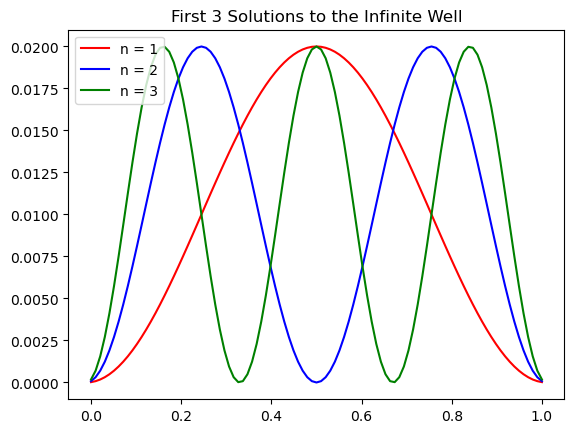

In [2]:
# First define the number of discrete steps in the well
s = 100
sigma = 1/s
x = np.linspace(0, 1, s-1)

##### Creating the Kinetic energy matrix #####

up = np.ones(s-2)                 # Vector of ones (-2 due to boundary conditions)
T_up = np.diag(up, 1)             # Placing the ones one above the diagonal entries    
T_down = T_up.T                   # Getting the transpose to place ones below diagonal entries
T_diag = 2*np.eye(s-1)            # Multiplying identity matrix by 2 to get twos in the diagonals
T_basic = T_up + T_down - T_diag  # Adding the three matrices together
T = -(1/(2*sigma**2)) * T_basic

##### Potential is 0 inside the well, so the Hamiltonian is just the kinetic energy #####
H = T
#print(H)

# The eigenvalues of the Hamiltonian will be the energy and the eigenvectors will be the solution to the SE
# Finding the eigenvalues and eigenvectors
[E, psi] = np.linalg.eig(H)    # This function calculates the eigenvalues and eigenvectors using matrix diagnalization
inds = E.argsort()
E, psi = E[inds], psi[:,inds]  # Sorting the eigenvalues and vectors together

# Plotting the solutions
plt.figure(1)
plt.title("First 3 Solutions to the Infinite Well")
plt.plot(x,psi[:,0]**2,color='red',label='n = 1')
plt.plot(x,psi[:,1]**2,color='blue',label='n = 2')
plt.plot(x,psi[:,2]**2,color='green',label='n = 3')
plt.legend(loc=2)
plt.plot()

# Energy eigenvalues agree with the formula for the infinite well
# Printing the first few energy levels
print("First 3 energy levels:", E[:3])


Now I'm comparing the calculated eigenvalues to the values calculated from the infinite well energy formula:
$$
E_n=\frac{n^2 \pi^2}{2}
$$

I'm also calculating the energy eigenvalues for different step sizes to test the accuracy of different step sizes. I'm getting the difference between the calculated values and values from the formula for the different quantum numbers at different step sizes. 

C:\Users\marcl\AppData\Local\Temp\ipykernel_12236\2988511578.py:57: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


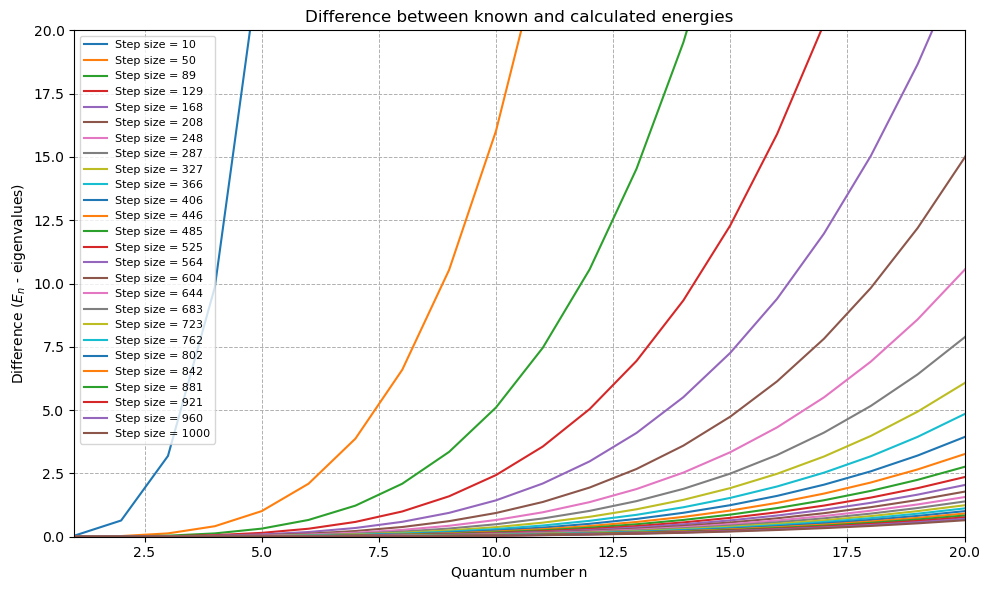

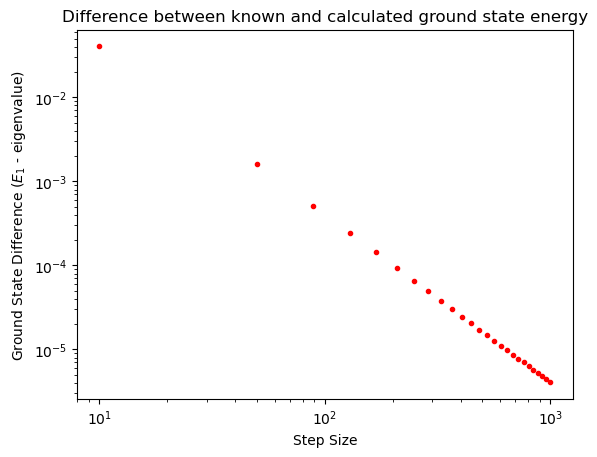

In [3]:
# Getting a list of a variety of different step sizes
step_loop = np.linspace(10,1000,26)
step_loop = np.round(step_loop).astype(float)

# Defining the known solution for infinite well eigenvalues
def infenergy(n):
    e = (n**2)*(np.pi**2) / 2
    return e

# Calculating the ground state energy from the formula
ground_state = infenergy(1)

# Looping through for different step sizes
for i in step_loop:
    s = int(i)
    sigma = 1/s
    x = np.linspace(0, 1, s-1)

    ##### Creating the Kinetic energy matrix #####

    up = np.ones(s-2)                 # Vector of ones (-2 due to boundary conditions)
    T_up = np.diag(up, 1)             # Placing the ones one above the diagonal entries    
    T_down = T_up.T                   # Getting the transpose to place ones below diagonal entries
    T_diag = 2*np.eye(s-1)            # Multiplying identity matrix by 2 to get twos in the diagonals
    T_basic = T_up + T_down - T_diag  # Adding the three matrices together
    T = -(1/(2*sigma**2)) * T_basic

    ##### Potential is 0 inside the well, so the Hamiltonian is just the kinetic energy #####
    H = T
    #print(H)

    # The eigenvalues of the Hamiltonian will be the energy and the eigenvectors will be the solution to the SE
    # Finding the eigenvalues and eigenvectors
    [E, psi] = np.linalg.eig(H)    # This function calculates the eigenvalues and eigenvectors using matrix diagnalization
    inds = E.argsort()
    E, psi = E[inds], psi[:,inds]  # Sorting the eigenvalues and vectors together

    
    # Creating a list of the known energy eigenvalues from the formula
    n = np.linspace(1, len(E), int(s-1) )            # list of the n of each eigenvalue (+1 because np.linspace is weird)

    known_energy = [infenergy(i) for i in n]  # calculating the value for each n from the formula

    diff = np.abs( known_energy - E )
    
    plt.figure(2, figsize=(10, 6))  # Setting up plot

    # Plotting the difference between known and calculated solutions
    plt.title("Difference between known and calculated energies")
    plt.plot(n,diff,label ='Step size = {}'.format(s))
    plt.xlabel('Quantum number n')
    plt.ylabel('Difference ($E_n$ - eigenvalues)')
    plt.xlim(1,20)
    plt.ylim(0,20)
    plt.grid(True, which='both', linestyle='--', linewidth=0.7)
    plt.legend(loc='upper left', fontsize=8)
    plt.tight_layout()
    plt.plot()
    
    
    # Now creating a plot of the difference between computed and known ground state energies for each step size
    ground_diff = np.abs( ground_state - E[0])
    
    # Plotting the difference between computed and known ground state energy as a function of step size
    plt.figure(3)
    plt.title("Difference between known and calculated ground state energy")
    plt.loglog(s,ground_diff,'r.')
    #plt.plot(s,ground_diff,'r.')
    plt.xlabel('Step Size')
    plt.ylabel('Ground State Difference ($E_1$ - eigenvalue)')
    plt.plot()

Now I'm decreasing the step size so I can find the smallest step size with acceptable accuracy. This is done to decrease computational time later in the project

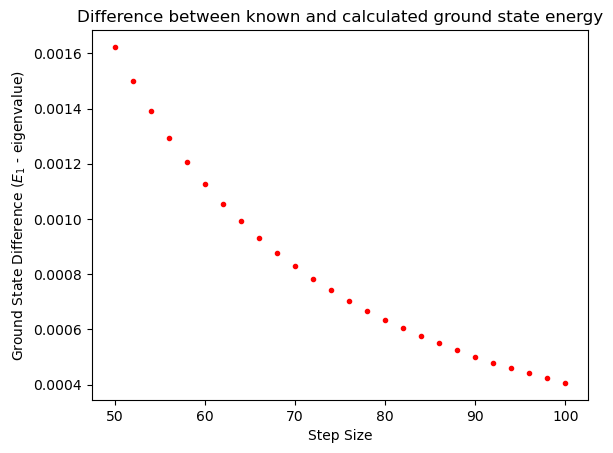

In [4]:
# Getting a list of a variety of different step sizes (this time smaller to investigate step sizes around/smaller than 100)
step_small = np.linspace(50,100,26)
step_small = np.round(step_small).astype(float)

# Looping through for different energies
for i in step_small:
    s = int(i)
    sigma = 1/s
    x = np.linspace(0, 1, s-1)

    ##### Creating the Kinetic energy matrix #####

    up = np.ones(s-2)                 # Vector of ones (-2 due to boundary conditions)
    T_up = np.diag(up, 1)             # Placing the ones one above the diagonal entries    
    T_down = T_up.T                   # Getting the transpose to place ones below diagonal entries
    T_diag = 2*np.eye(s-1)            # Multiplying identity matrix by 2 to get twos in the diagonals
    T_basic = T_up + T_down - T_diag  # Adding the three matrices together
    T = -(1/(2*sigma**2)) * T_basic

    ##### Potential is 0 inside the well, so the Hamiltonian is just the kinetic energy #####
    H = T
    #print(H)

    # The eigenvalues of the Hamiltonian will be the energy and the eigenvectors will be the solution to the SE
    # Finding the eigenvalues and eigenvectors
    [E, psi] = np.linalg.eig(H)    # This function calculates the eigenvalues and eigenvectors using matrix diagnalization
    inds = E.argsort()
    E, psi = E[inds], psi[:,inds]  # Sorting the eigenvalues and vectors together
    
    # Now creating a plot of the difference between computed and known ground state energies for each step size
    ground_diff = np.abs( ground_state - E[0])
    
    # Plotting the difference between computed and known ground state energy as a function of step size
    plt.figure(3)
    plt.title("Difference between known and calculated ground state energy")
    #plt.loglog(s,ground_diff,'r.')
    plt.plot(s,ground_diff,'r.')
    plt.xlabel('Step Size')
    plt.ylabel('Ground State Difference ($E_1$ - eigenvalue)')
    plt.plot()

    
    

Now Adding the Gaussian external potential to the Hamiltonian. The Hamiltonian is the sum of the kinetic and potential energy matrices.

First 3 energy levels: [-311.35115417  -36.73425243   21.54595144]


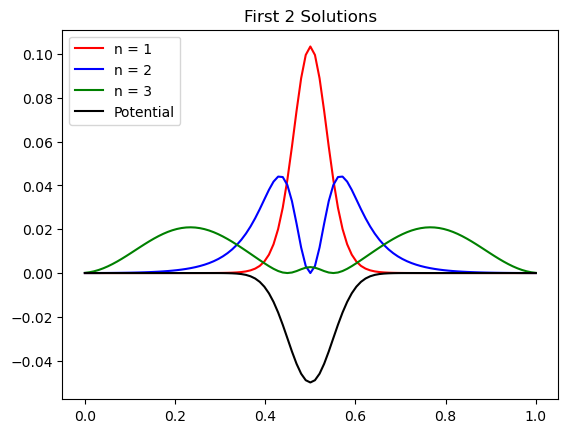

In [28]:
# First define the number of discrete steps in the well
s = 100
sigma = 1/s
x = np.linspace(0, 1, s-1)

##### Creating the Kinetic energy matrix #####

up = np.ones(s-2)                 # Vector of ones (-2 due to boundary conditions)
T_up = np.diag(up, 1)             # Placing the ones one above the diagonal entries    
T_down = T_up.T                   # Getting the transpose to place ones below diagonal entries
T_diag = 2*np.eye(s-1)            # Multiplying identity matrix by 2 to get twos in the diagonals
T_basic = T_up + T_down - T_diag  # Adding the three matrices together
T = -(1/(2*sigma**2)) * T_basic

##### Creating the Potential energy matrix #####

# Defining the gaussian potential
def gaussian(x):
    f = A*(np.exp(-((x-b)**2)/(2*(o**2))))
    return f

# Parameters of Gaussian
A = -500  # Amplitude (change sign for attractive/replusive potential)
b = 0.5   # x position
o = 0.05   # Standard deviation

# Constructing Matrix
potential = gaussian(x)
V = np.diag(potential)


##### Creating Hamiltonian Matrix (sum of kinetic and potential matrices) #####
H_1 = T + V

# The eigenvalues of the Hamiltonian will be the energy and the eigenvectors will be the solution to the SE
# Finding the eigenvalues and eigenvectors
[E_1, psi_1] = np.linalg.eig(H_1)     # This function calculates the eigenvalues and eigenvectors using matrix diagnalization
inds = E_1.argsort()
E_1, psi_1 = E_1[inds], psi_1[:,inds] # Sorting the eigenvalues and vectors together

#print(E_1)

plt.figure(1)
plt.title("First 2 Solutions")
plt.plot(x,psi_1[:,0]**2,color='red',label='n = 1')
plt.plot(x,psi_1[:,1]**2,color='blue',label='n = 2')
plt.plot(x,psi_1[:,2]**2,color='green',label='n = 3')
plt.plot(x,potential/10000,color='black', label='Potential')
plt.legend(loc=2)
plt.plot()

# Energy eigenvalues agree with the formula for the infinite well
# Printing the first few energy levels
print("First 3 energy levels:", E_1[:3])

The eigenfunctions and eigenvalues look to be quantitively correct. The amplitude of the Gaussian can be changed to investigate this.

Now starting some 1 electron orbital-free DFT. The energy of a system can be written as a functional of the electron density. For this system (1 electron) the energy functional is given by:

$$
E[\rho] = T[\rho] + \int V(x) \rho dx
$$

$V(x)$ is the external Gaussian potential and $\rho$ is the electron density. Starting with letting the kinetic energy given by the Von-Weizsacker functional (can be derived from the Schrodinger equation for 1 electron):

$$
T[\rho] = \int \frac{\mid \nabla^2 \rho(x) \mid}{8\rho(x)} dx
$$

For calculating the ground state energy $E[\rho_1]$, we input the magnitude squared of the ground state solution to the Schrodinger equation as the density $\rho$. Then the ground state eigenvalues from the Schrodinger equation should be exactly equal to the energy calculated using DFT (only exactly true for the 1 electron case).



In [50]:
# The density will be the magnitude squared of the ground state solution of the schrodinger equation
density = (psi_1[:,0])**2

# x-axis grid
x = np.linspace( 0,1 , int(s-1))

# list for the index of each value in psi_1[0]
n = np.arange( 1, len(psi_1[0])-1)

# Using the central difference method to calculate the derivatives
def central_sec(x, y, n):
        f = ( ( y[int(n+1)] ) - ( 2 * y[int(n)] ) + ( y[int(n-1)] ) ) / ( x[int(n+1)] - x[int(n)] )**2
        return f

# Calculating second derivative for all points
second_derivative = [0] + [central_sec(x , density, i) for i in n] + [0]  

integrator = second_derivative / (8 * density)

kinetic_energy = simps(integrator, x)

integral_term = simps(potential*density,x)

energy = kinetic_energy + integral_term
print(energy)


272.8411667926582
